<a href="https://colab.research.google.com/github/ankita2799/projects/blob/master/Amazon_review_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
df=pd.read_table('amazon.tsv')   #Load review data from csv file
print(df)                        ##Display  record

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
from textblob import TextBlob
x=df['verified_reviews'].astype(str)              # Make sure about the correct data type
pol = lambda x: TextBlob(x).sentiment.polarity    # Create quick lambda functions to find the polarity of each review
df['polarity'] = x.apply(pol)
print(df['polarity'])

0       0.625000
1       0.875000
2      -0.100000
3       0.350000
4       0.000000
          ...   
3145    1.000000
3146    0.333333
3147    0.237662
3148    0.316667
3149    0.700000
Name: polarity, Length: 3150, dtype: float64


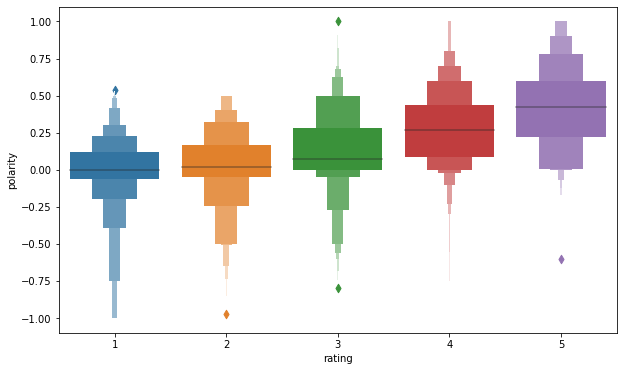

In [ ]:
plt.figure(figsize=(10,6))
s.boxenplot(x='rating', y='polarity', data= df)
plt.show()


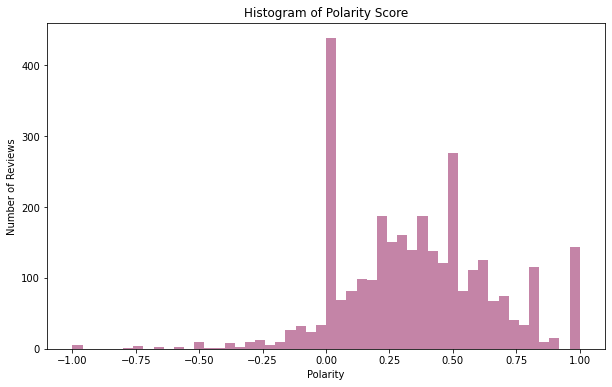

In [ ]:

plt.figure(figsize=(10,6))
plt.hist(df.polarity, bins=50, color='#8B0A50', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show()

In [ ]:
df.loc[(df.polarity ==0) & (df.rating == 1)].verified_reviews.head(10).tolist()

['Item no longer works after just 5 months of use. Will not connect to wifi and unresponsive to reset requests.',
 'I returned 2 Echo Dots & am only getting refund for 1. I returned 2 in one package. I want my refunds for both of them. They are in the same package. Can you not see them both???!!!',
 'not working',
 "I'm an Echo fan but this one did not work",
 ' ',
 "It worked for a month or so then it stopped. I've tried everything to try and make it work but nothing is working. I want a refund",
 'Dont trust this....',
 ' ',
 'Does not work all the time',
 "I've already returned it."]

In [ ]:
sub = lambda x: TextBlob(x).sentiment.subjectivity             # Create quick lambda functions to find the subjectivity of each review
df['subjectivity'] = df['verified_reviews'].apply(sub)
df.sample(10)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
98,4,30-Jul-18,Charcoal Fabric,Love it!,1,0.625000,0.600000
2981,5,30-Jul-18,Black Dot,The Echo Dot was everything that I expected an...,1,0.200000,0.450000
687,5,18-May-18,Black,My 2nd one and I use them all the time.,1,0.000000,0.000000
1623,5,29-Jul-18,Black Show,"Versatile use, can watch movies or news. Able...",1,0.466667,0.525000
1904,5,26-Jul-18,Black Plus,better sound than my echo dot. Simple to set u...,1,0.183333,0.330952
1039,4,28-Jul-18,Charcoal Fabric,Works awesome!,1,1.000000,1.000000
2713,5,30-Jul-18,White Dot,Super easy to hook up and program. I use the m...,1,0.553333,0.670000
2671,4,30-Jul-18,White Dot,Better sound.,1,0.450000,0.450000
920,5,29-Jul-18,Heather Gray Fabric,Sure did !! Love it !!,1,0.781250,0.744444
2779,5,30-Jul-18,Black Dot,Use the product for music and it’s great!,1,1.000000,0.750000


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

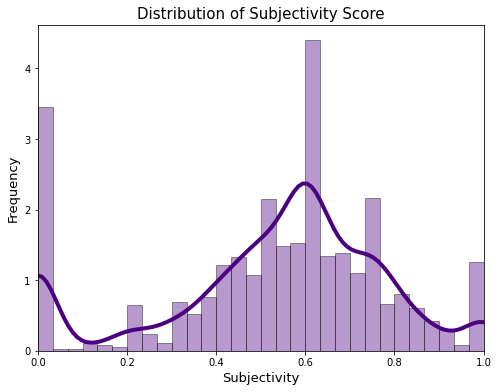

In [ ]:
 # Density Plot and Histogram of subjectivity
plt.figure(figsize=(8,6))
s.distplot(df['subjectivity'], hist=True, kde=True,   
bins=int(30), color = '#4B0082',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])    
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

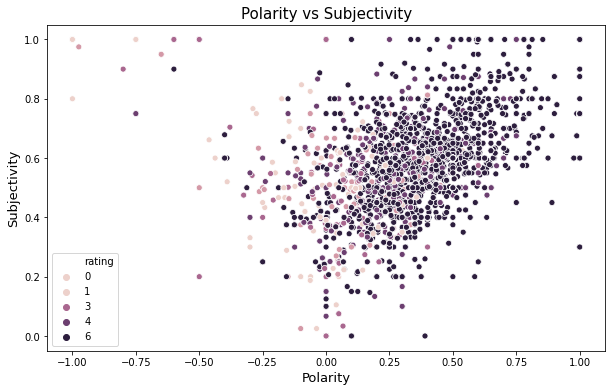

In [ ]:
# Graph of polarity vs subjectivity
plt.figure(figsize=(10,6))
s.scatterplot(x='polarity', y='subjectivity', hue='rating', data=df)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show()

In [ ]:
df.loc[(df["rating"] == 4) & (df.polarity == 1) & (df.subjectivity ==1)].verified_reviews.head(10).tolist()

['Excellent product, set up with ease as well.',
 'Works awesome!',
 'Perfect',
 'It was perfect',
 'Excellent product, set up with ease as well.',
 'Works awesome!']

In [ ]:
df.loc[(df["rating"] == 5) & (df.polarity == 1) & (df.subjectivity ==0.8)].verified_reviews.head(10).tolist()

['Loved it!! Wish I would have bought one sooner.']

In [ ]:
import pandas as pd
x=df.iloc[:,3].values   #text data
y=df.iloc[:,0].values   #rating data


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)    # 70% is training data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2520,)
(2520,)
(630,)
(630,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
text_model=Pipeline([('tfidf',TfidfVectorizer()),('mode',MultinomialNB())])  # creating a model

In [ ]:
text_model.fit(x_train,y_train)
y_pred=text_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)*100

71.9047619047619

In [ ]:
confusion_matrix(y_pred,y_test)

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [ 33,  13,  41,  90, 453]])